In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from mcmc_samplers import SGHMCSampler,LossModule
from ResForkNet import *
import utils as ut
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from collections import OrderedDict
import matplotlib.pyplot as plt
import hiddenlayer as hl
from IPython.display import display, clear_output
torch.manual_seed(0)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

plt.style.use('ggplot')

cpu


In [ ]:
def SimpleTrade(predictions, prices, model, path_to_model = None, horizon = 'week', budget = 1000):
    portfolio = {}
    model.load_state_dict(torch.load(path_to_model,map_location = torch.device(device)))
    model = model.to(device)
    
    
    
    

In [2]:
stocks = ['AAPL','AMZN','GOOGL','HPQ','INTC','MSFT','NTAP','NVDA','SPY','T','XRX']
prices = ut.portfolioTS(stocks)
prices

,AAPL,AMZN,GOOGL,HPQ,INTC,MSFT,NTAP,NVDA,SPY,T,XRX
timestamp,,,,,,,,,,,
2004-08-19,0.472305,38.630,50.322842,6.115550,13.968102,17.414495,16.322482,3.572674,78.500383,10.037756,26.095525
2004-08-20,0.473689,39.510,54.322689,6.253677,13.720598,17.465865,16.380275,3.784092,79.051342,10.045613,26.635166
2004-08-23,0.477995,39.450,54.869377,6.174254,13.891947,17.542920,16.528887,3.866822,78.850990,10.061328,26.692985
2004-08-24,0.491375,39.050,52.597363,6.105191,13.752329,17.542920,16.784828,3.722812,78.958320,10.053470,26.191889
2004-08-25,0.508293,40.300,53.164113,6.250224,13.930024,17.742565,16.974721,3.882142,79.494964,10.092757,26.076252
2004-08-26,0.533054,40.190,54.122070,6.281302,13.815792,17.671723,16.669242,3.891334,79.494964,10.112400,26.134071
2004-08-27,0.528286,39.900,53.239345,6.305474,13.974448,17.684603,16.809597,3.964871,79.745398,10.151687,26.114798
2004-08-30,0.524749,38.310,51.162935,6.188067,13.707905,17.581561,16.388531,3.833117,79.087115,10.135972,25.825704
2004-08-31,0.530439,38.140,51.343492,6.177707,13.511172,17.581561,16.570168,3.817797,79.502122,10.132044,25.883523


In [111]:
transform = ut.ToTensor()
dataset = ut.TechnicalPortfolioTimeSeries(components = stocks, window = 30, pred_window = 30,transform = transform)
loader = DataLoader(dataset, batch_size=len(dataset),shuffle=False, num_workers=0)
model = ResForkNet(n_dependents = len(stocks), num_inputs = 60, timesteps = 30, num_channels = [128]*2)
model.load_state_dict(torch.load('Month/model_month_8',map_location = torch.device(device)))
with torch.no_grad():
    batch_data,_ = next(iter(loader))
    predictions = model(batch_data)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(3814, 60, 330) (3814, 11)
torch.Size([1, 3840])


In [112]:
predicted_prices = pd.DataFrame(data=predictions.numpy(), columns = stocks, index = dataset.merged_df.index[60:])
predicted_prices

,AAPL,AMZN,GOOGL,HPQ,INTC,MSFT,NTAP,NVDA,SPY,T,XRX
2006-01-19,0.617585,44.063244,206.725845,12.540881,13.650694,20.631248,28.754555,14.961996,93.311890,11.772417,27.965332
2006-01-20,2.000274,46.374416,213.350037,11.750611,13.464952,20.586788,27.092394,14.045677,93.191193,12.299231,27.580269
2006-01-23,1.685537,44.896072,212.689133,11.468399,12.330718,19.235371,26.506227,16.038103,92.291840,11.451886,26.655766
2006-01-24,2.562629,45.251965,216.437027,12.185767,12.256693,19.774994,26.594496,12.695354,93.286537,12.403727,27.893303
2006-01-25,0.793700,40.542675,215.536316,11.671897,13.087794,19.589371,24.870235,14.727949,91.750992,11.983265,26.286110
2006-01-26,1.256165,38.200291,212.742279,11.637920,14.142872,20.909582,25.911940,14.779789,93.527557,11.121007,27.608313
2006-01-27,1.880847,49.738235,218.541550,12.174353,14.034963,20.305590,25.710667,14.307348,94.880844,12.096586,27.921158
2006-01-30,0.906759,41.453430,214.680664,11.905040,13.356060,20.190954,26.133209,15.327260,92.122894,11.456811,27.057785
2006-01-31,2.122319,46.525684,209.349121,11.364115,13.303716,19.553185,28.409651,15.383144,94.085587,11.530353,28.067905
2006-02-01,2.318069,42.719891,206.004623,12.543119,13.574111,20.157314,26.590094,11.715357,95.168144,11.898813,28.163177


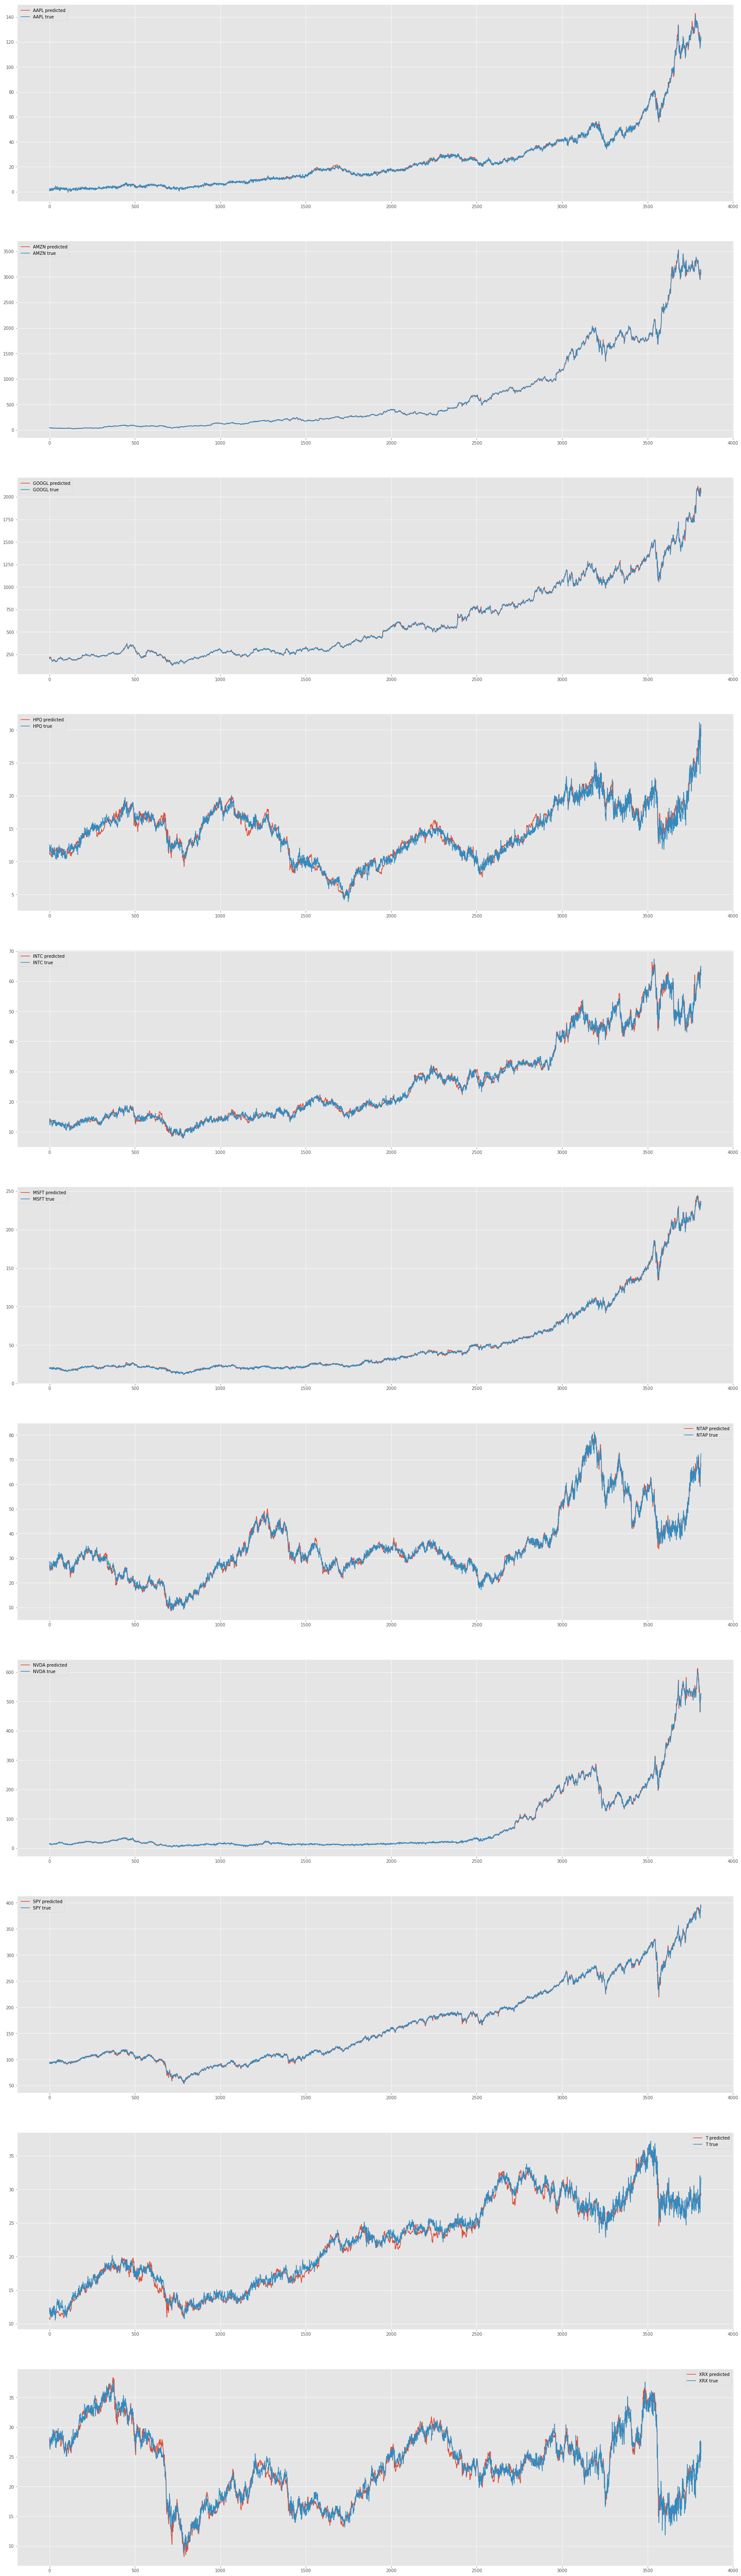

In [113]:
fig, axs = plt.subplots(11,1, figsize=(30,110))
for i,ax in enumerate(axs):
    ax.plot(range(len(predicted_prices.index)),prices.loc[predicted_prices.index,stocks[i]],
            label = predicted_prices.columns[i]+" predicted")
    ax.plot(range(len(predicted_prices.index)),predicted_prices[stocks[i]],
            label = predicted_prices.columns[i]+" true")
    ax.legend()
plt.show()